# Python fundamentals part 2
- error handling
    - try - except
    - different types of error
- file handling
- functions
- matplotlib
- numpy


### Error handling
- syntax error
- runtime error (exceptions)
- logical errors


##### syntax errors
- easy to fix

In [1]:
prin("linear regression is a supervised learning algorithm")


NameError: name 'prin' is not defined

In [2]:
print("linear regression is a supervised learning algorithm")

linear regression is a supervised learning algorithm


##### runtime error
- easy to fix

In [7]:
# [0,1,2,3,4]
numbers = list(range(5))

numbers[5]

IndexError: list index out of range

##### logical error
- can be hard to detect
- harder to find as the code runs
- some extensive debugging could be involved here

In [9]:
import numpy as np
radius = 5
# circle area is actually pi*r^2
circle_area = np.pi*radius # kommer ge ett felaktigt resultat
print(f"{circle_area = :.2f} area units") 

circle_area = 15.71 area units


##### try except


In [10]:
age = float(input("Enter your age: "))
print(age)

48.0


In [12]:
age = float(input("Enter your age: "))
if not 0 <= age <= 125:
    raise ValueError(f"You entered {age}, age must be between 0 and 125")


ValueError: You entered 1235.0, age must be between 0 and 125

In [ ]:
while True:
    try:
        age = float(input("Enter your age: "))
        if not 0 <= age <= 125:
            raise ValueError(f"You entered {age},age must be between 0 and 125")
        print(f"You are {age} years old")
        break
    except ValueError as err:
        print(err)

##### Functions
- reuse code
- organize code
- increase readability
- modular code
- DRY - dont repeat yourself
- break down complex program into smaler parts

def name(param1,param2...):
statements
...
name(arg1,arg2...)

In [22]:
# number is input parameter
def cuber(number):
    return number**3
# call the function cuber with input argument 2
cuber(6)

216

In [27]:
cubes = [cuber(number) for number in range(6)]
cubes

[0, 1, 8, 27, 64, 125]

In [29]:
def squarer(x): # input parameter x 
    return x**2 # returns x**2

print(squarer(3))
squares = [squarer(x) for x in range(10)]
print(squares)

9
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


#### Default value

In [44]:
for i in range(1, 5 +1):
    print(i*"x ")
    

x 
x x 
x x x 
x x x x 
x x x x x 


In [45]:
# void function - returns None, but has a side effect by printing
def draw_ascii_triangle(numbers_rows=5):
    for i in range(1, numbers_rows+1):
        print(i*"x ")

draw_ascii_triangle()

x 
x x 
x x x 
x x x x 
x x x x x 


In [46]:
# 10 overwrites the default value of 5
draw_ascii_triangle(10)

x 
x x 
x x x 
x x x x 
x x x x x 
x x x x x x 
x x x x x x x 
x x x x x x x x 
x x x x x x x x x 
x x x x x x x x x x 


In [55]:
# number_rows = 5 is a default value
def draw_ascii_pattern(number_rows=5):
    for i in range(1,number_rows + 1):
        print(i * "x " + (number_rows - i) * "o ")

draw_ascii_pattern()
draw_ascii_pattern(2)
draw_ascii_pattern(4)


x o o o o 
x x o o o 
x x x o o 
x x x x o 
x x x x x 
x o 
x x 
x o o o 
x x o o 
x x x o 
x x x x 


In [58]:
def smallest(number1, number2):
    if number1 > number2:
        return number2
    return number1
smallest(7,2)

2

### Arbitrary arguments, *args
- arbitrary number of positional arguments

In [2]:
def average(*numbers):
    sum_ = 0
    for number in numbers:
        sum_ += number

    return sum_/len(numbers)

# (1+2+3)/3
average(1,2,3)


2.0

In [3]:
average(1,2,34,5,12,51,23,34)

20.25

In [5]:
def my_mean(*args):
    sum_ = 0 #
    for arg in args:
        sum_ += arg
    return sum_/len(args)
print(my_mean(1,2,3,4))

2.5


#### Keyword arguments, *kwargs

In [26]:
import numpy as np

def simulate_dices(throws=1,dices=2):
    return np.random.randint(1,7, size=(throws,dices))

simulate_dices()

array([[5, 2]])

In [20]:
simulate_dices(5,2)

array([[3, 4],
       [6, 5],
       [2, 5],
       [1, 4],
       [1, 5]])

In [27]:
simulate_dices(throws=6, dices=4).shape

(6, 4)

In [30]:
simulate_dices(dices=3)

array([[4, 1, 4]])

In [32]:
import numpy as np

def simulate_dices(throws = 1, dices = 2):
    print(np.random.randint(1,7,(throws,dices)))

simulate_dices(throws = 2)

print("\ncan specify second keyword argumnet as long as first has default value")
simulate_dices(dices = 3)

print("\ndifferent orders")
simulate_dices(dices = 3, throws = 3)

[[5 3]
 [5 2]]

can specify second keyword argumnet as long as first has default value
[[2 4 5]]

different orders
[[5 4 2]
 [3 6 1]
 [5 3 6]]


#### Unpacked arguments

In [33]:
option_list = [2, 3]
option_dict = dict(dices = 3, throws = 2)

simulate_dices(*option_list)

print()
simulate_dices(**option_dict)

[[5 2 4]
 [1 4 6]]

[[5 3 5]
 [1 6 3]]


### Lambda functions
- anonymous functions
- can be used inside other functions
- examples will be shown later in the course

In [34]:
cuber = lambda x: x**3

cuber(5)

125

In [38]:
students = [("Alice", 85),("Bob",92),("Charlie",78),("David", 95)]

# sort students by their scores in descending order
sorted_students = sorted(students, key=lambda student: student[1], reverse=True)

for student in sorted_students:
    print(f"{student[0]}: {student[1]}")

David: 95
Bob: 92
Alice: 85
Charlie: 78


### Matplotlib


x = (-5, -4, -3, -2, -1, 0, 1, 2, 3, 4)
y = [-17, -14, -11, -8, -5, -2, 1, 4, 7, 10]
y2= [23, 14, 7, 2, -1, -2, -1, 2, 7, 14]


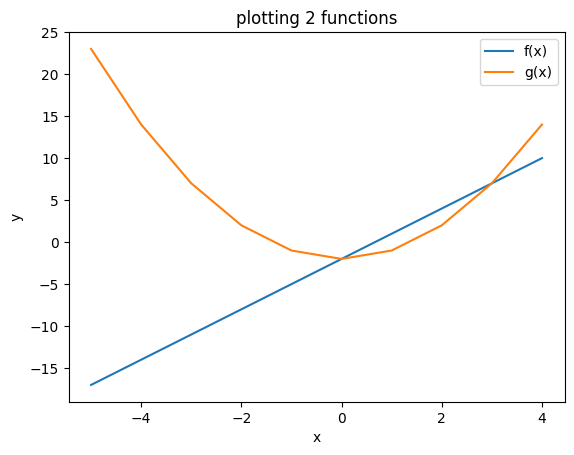

In [8]:
import matplotlib.pyplot as plt

f = lambda x: 3 * x - 2

def g(x):
    return x**2 - 2

# similar to list but immutable, i.e can´t change values in a tupl
x = tuple(range(-5,5))
print(f"{x = }") 

y = [f(i) for i in x]
y2 = [g(i) for i in x]

print(f"{y = }")
print(f"{y2= }")

plt.plot(x, y)
plt.plot(x, y2)
plt.title("plotting 2 functions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["f(x)","g(x)"])
plt.show()

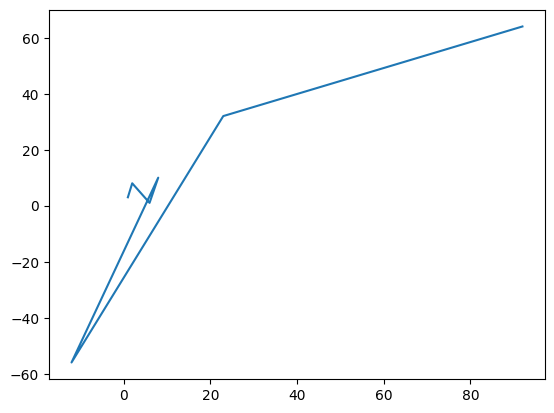

In [8]:
import matplotlib.pyplot as plt
import numpy as np

xpoint = np.array([1,2,6,8,-12,23,92])
ypoint = np.array([3,8,1,10,-56,32,64])
#plt.plot(xpoint,ypoint, "o")
plt.plot(xpoint,ypoint)
plt.show()

### Plot with numpy

In [1]:
import numpy as np

x = np.linspace(-5,5)
x

array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

In [2]:
x.shape

(50,)

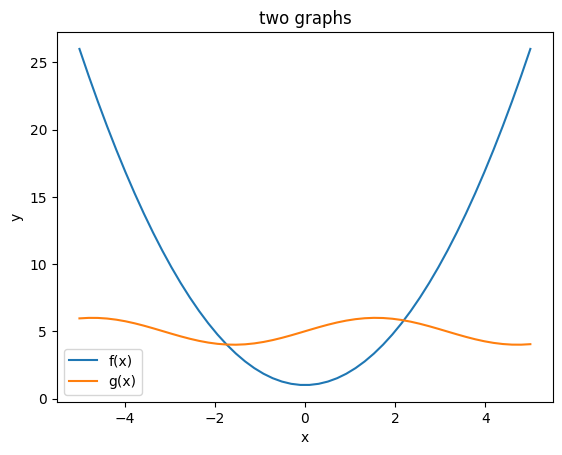

In [5]:
import matplotlib.pyplot as plt

f = lambda x: x**2 + 1
g = lambda x: np.sin(x)+ 5
# # OOP approach
fig, ax = plt.subplots(1)

ax.plot(x, f(x), label = "f(x)")
ax.plot(x, g(x), label = "g(x)")
ax.set(title ="two graphs", xlabel = "x",ylabel = "y")
ax.legend()


##### more on numpy

In [7]:
vector1 = np.array([2,5,1])
print(f"{vector1 = }")

# elementwise multiplication
vector1*2

vector1 = array([2, 5, 1])


array([ 4, 10,  2])

In [8]:
# elementwise addition
vector1 + 3

array([5, 8, 4])

In [9]:
[2,5,1] + 3

TypeError: can only concatenate list (not "int") to list

In [10]:
# the list copies three times and concatenates
[2,5,1] * 3

[2, 5, 1, 2, 5, 1, 2, 5, 1]

In [11]:
vector1.sum()

8

In [12]:
vector1.shape

(3,)

In [13]:
vector1[-1]

1

### Performance

In [14]:
%%timeit
import random as rnd

number_dices = 1000000
[rnd.randint(1,6) for _ in range(number_dices)]



537 ms ± 5.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
number_dices = 1000000
np.random.randint(1,7, number_dices)

11.5 ms ± 174 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
715/11.8

60.593220338983045